In [20]:
#pip install xgboost

In [21]:
import numpy as np
import numpy
import pandas as pd
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import plot_importance
import seaborn as sns
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification

In [22]:
mesames_treino = read_csv('mes01020304050607080910_ano2020acc.csv', delimiter=",", low_memory=False, keep_default_na=False)
mesames_teste = read_csv('mes11_ano20.csv', delimiter=",", low_memory=False, keep_default_na=False)

In [23]:
#mesames_treino
#mesames_teste

In [24]:
mesames_treino = mesames_treino.drop(mesames_treino.columns[0], axis=1)

In [25]:
mesames_treino = mesames_treino.drop(mesames_treino.columns[0], axis=1)

In [26]:
mesames_treino = mesames_treino.drop(mesames_treino.columns[0], axis=1)

In [27]:
mesames_treino = mesames_treino.drop(mesames_treino.columns[0], axis=1)

In [28]:
mesames_teste = mesames_teste.drop(mesames_teste.columns[0], axis=1)

In [29]:
mesames_teste = mesames_teste.drop(mesames_teste.columns[0], axis=1)

In [30]:
mesames_teste = mesames_teste.drop(mesames_teste.columns[0], axis=1)

In [31]:
mesames_teste = mesames_teste.drop(mesames_teste.columns[0], axis=1)

In [32]:
#mesames_teste = mesames_teste.drop(mesames_teste.columns[12], axis=1)

In [33]:
#mesames_treino = mesames_treino.drop(mesames_treino.columns[12], axis=1)

In [34]:
#
mesames_treino


,DESC_RESP,DIARREIA,DISPNEIA,DOR_ABD,FADIGA,FEBRE,GARGANTA,PERD_OLFT,PERD_PALA,SATURACAO,TOSSE,VOMITO,CLASSI_FIN
0,1,2,2,0,0,1,1,0,0,1,1,2,0
1,1,2,1,0,0,1,2,0,0,1,1,2,0
2,1,2,1,0,0,1,2,0,0,1,2,2,0
3,2,2,1,0,0,1,2,0,0,2,1,2,0
4,1,2,1,0,0,1,2,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248004,1,2,1,0,0,1,2,0,0,1,1,2,1
248005,2,2,2,2,2,2,2,2,2,1,2,2,0
248006,2,2,1,2,2,2,2,2,2,1,2,2,0
248007,2,2,1,2,2,1,2,2,1,2,1,2,1


In [35]:
#
mesames_teste

,DESC_RESP,DIARREIA,DISPNEIA,DOR_ABD,FADIGA,FEBRE,GARGANTA,PERD_OLFT,PERD_PALA,SATURACAO,TOSSE,VOMITO,CLASSI_FIN
0,1,2,1,0,0,1,2,0,0,1,1,2,0
1,1,2,1,0,0,1,2,0,0,1,1,2,0
2,1,2,1,0,0,1,1,0,0,1,1,2,1
3,1,2,1,0,0,1,2,0,0,1,1,2,0
4,1,2,2,0,0,1,2,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,1,2,1,2,1,2,2,2,2,1,1,2,1
26054,1,2,1,0,0,1,2,0,0,1,1,2,0
26055,1,2,1,0,0,1,2,0,0,1,1,2,1
26056,1,1,1,2,2,2,1,2,2,1,1,2,0


In [36]:
dataset_treino = mesames_treino.values
# split data into X and y
n, m = mesames_treino.shape 
X = dataset_treino[:,0:m-1]
Y = dataset_treino[:,m-1]

In [37]:
dataset_teste = mesames_teste.values
# split data into X and y
n1, m1 = mesames_teste.shape 
X1 = dataset_teste[:,0:m1-1]
Y1 = dataset_teste[:,m1-1]

              precision    recall  f1-score   support

           0       0.51      0.29      0.37      9900
           1       0.66      0.83      0.73     16158

    accuracy                           0.63     26058
   macro avg       0.59      0.56      0.55     26058
weighted avg       0.60      0.63      0.60     26058



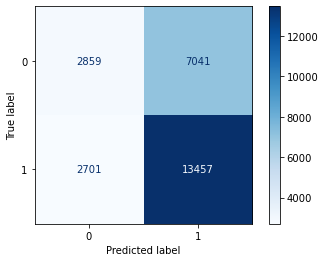

In [38]:
seed = 7
test_size = 0.33

X_train = X
X_test = X1
y_train = Y
y_test = Y1

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

In [39]:
#pip install shap

In [ ]:
import shap

# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value
#print(shap_values)
#print(expected_value)


In [ ]:
# O gráfico é calculado por sample, ou seja, cada linha possui seu shap value
# O  valor inferior no gráfico é base value ou Expected value E[f(x)] e f(x) a predição do modelo 
# E[f(x)] é o valor que seria previsto se não conhecêssemos nenhuma feature para a saída atual
# Em outras palavras, é a previsão média, ou média(y)
# Assim, E[f(x)] número médio previsto casos de covid entre todas as observações
# O valor final f(x) é o número previsto de casos para esta observação.

i= 1000
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[m-i], features = X[m-i,:], 
feature_names=['DESC_RESP','DIARREIA','DISPNEIA','DOR_ABD','FADIGA','FEBRE','GARGANTA','PERD_OLFT','PERD_PALA','SATURACAO','TOSSE','VOMITO', 'CLASSI_FIN'], max_display = 20)